In [1]:
# Import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import train_test_split

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_data_df = pd.read_csv('../Resources/cleaned_df.csv')

# Review the DataFrame
lending_data_df.head()

,Duration,Cost of Travel(Entire Trip) in Euros,Mode of Travel,Stay,First Name,Last Name,Date of Birth,Address,Age,Sex,Nationality,Date of Travel,Year,Month,Day,Cost per Day,ZIP
0,1,20111.0,Flight,Hotel,Cristina,Fuentes,1914-06-14,"5143 Pope Camp Apt. 028\nLake Emily, UT 71371",74,Non-Binary,Lao People's Democratic Republic,2022-09-13,2022,9,13,20111.000000,71371
1,5,29681.0,Car,Hotel,Patricia,Young,1923-09-25,716 Dominguez Row Suite 775\nSouth Tiffanyboro...,19,Female,Gabon,2021-09-04,2021,9,4,5936.200000,27800
2,7,24950.0,Flight,Airbnb,Christina,Kirby,1935-01-02,"PSC 4600, Box 1237\nAPO AE 32510",36,Female,Syrian Arab Republic,2021-01-25,2021,1,25,3564.285714,32510
3,19,18676.0,Roadtrip,Airbnb,Michael,Hudson,1982-04-21,"7013 Bryant Club Suite 695\nSouth Tina, WI 26739",38,Non-Binary,Afghanistan,2022-01-28,2022,1,28,982.947368,26739
4,28,18899.0,Flight,Airbnb,Francisco,Hensley,1913-06-29,"074 Scott Brook Suite 700\nLukeville, VA 46541",38,Non-Binary,Uruguay,2021-10-21,2021,10,21,674.964286,46541


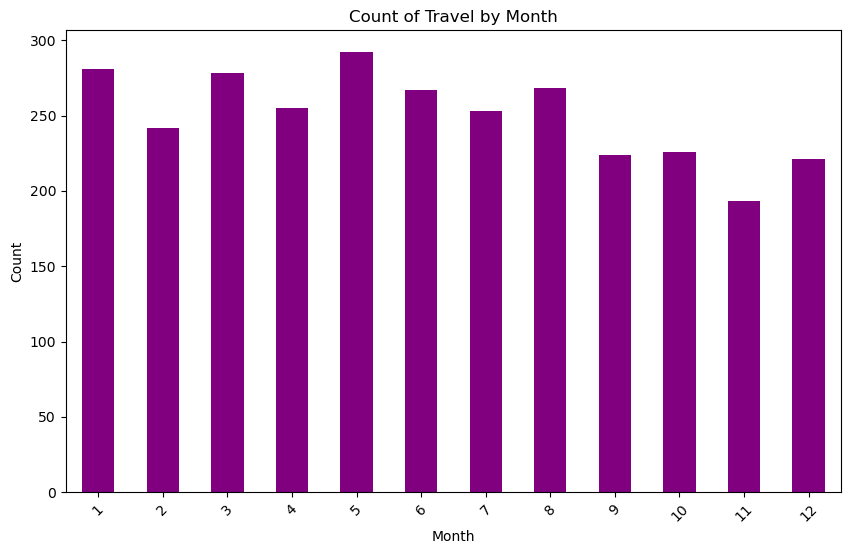

In [4]:
# Group the data by month and count the occurrences
monthly_counts = lending_data_df['Month'].value_counts().sort_index()

# Create a plot
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar', color='purple')
plt.title('Count of Travel by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

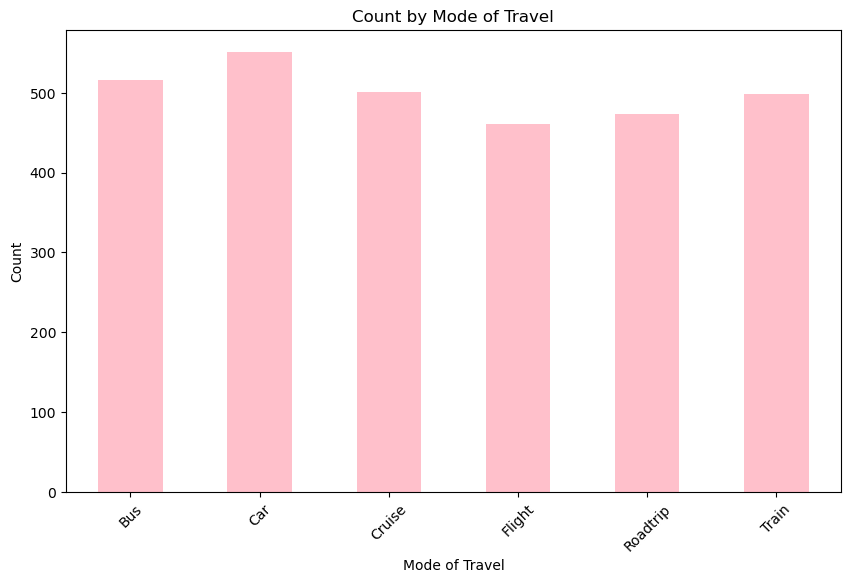

In [6]:
# Explore Mode of Travel
grouped_travelmode = lending_data_df.groupby('Mode of Travel')
travelmode_counts = grouped_travelmode.size()

plt.figure(figsize=(10, 6))
travelmode_counts.plot(kind='bar', color='pink')
plt.title('Count by Mode of Travel')
plt.xlabel('Mode of Travel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

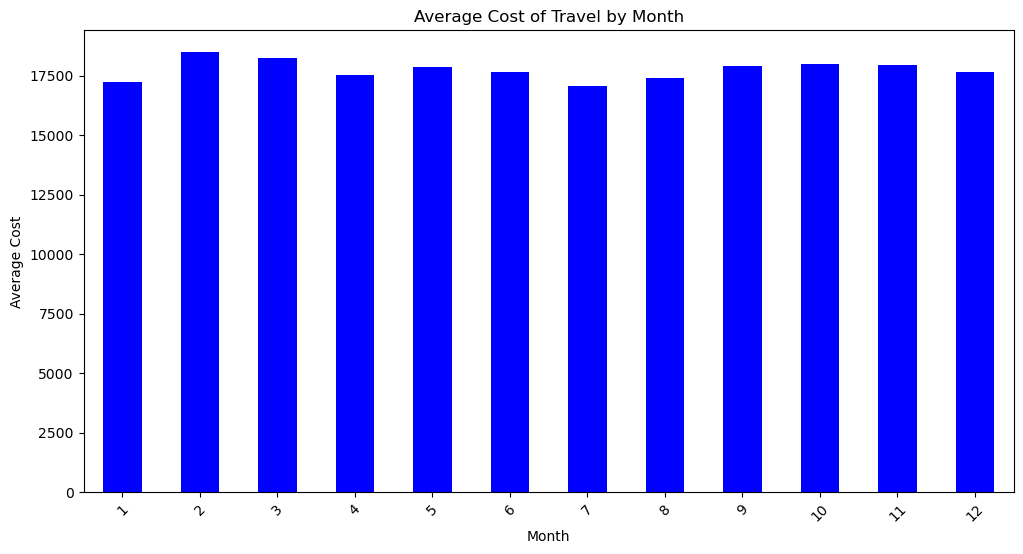

In [8]:
# Group the data by 'Month' and calculate the average cost for each month
monthly_average_cost = lending_data_df.groupby('Month')['Cost of Travel(Entire Trip) in Euros'].mean()

# Create a plot
plt.figure(figsize=(12, 6))
monthly_average_cost.plot(kind='bar', color='blue')
plt.title('Average Cost of Travel by Month')
plt.xlabel('Month')
plt.ylabel('Average Cost')
plt.xticks(rotation=45)
plt.show()

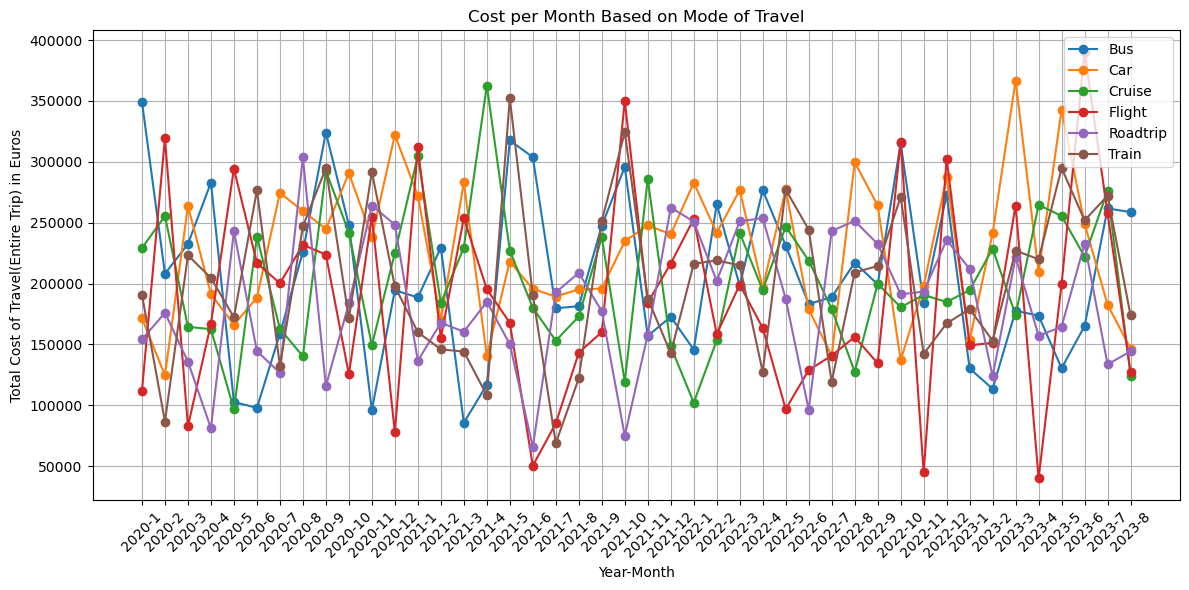

In [11]:
# Group the data by "Mode of Travel" and calculate the total cost per month
mode_cost_per_month = lending_data_df.groupby(['Mode of Travel', 'Year', 'Month'])['Cost of Travel(Entire Trip) in Euros'].sum().reset_index()

# Create a bar plot to visualize the results
plt.figure(figsize=(12, 6))
for mode in mode_cost_per_month['Mode of Travel'].unique():
    mode_data = mode_cost_per_month[mode_cost_per_month['Mode of Travel'] == mode]
    plt.plot(mode_data['Year'].astype(str) + '-' + mode_data['Month'].astype(str), mode_data['Cost of Travel(Entire Trip) in Euros'], marker='o', label=mode)

plt.xlabel("Year-Month")
plt.ylabel("Total Cost of Travel(Entire Trip) in Euros")
plt.title("Cost per Month Based on Mode of Travel")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


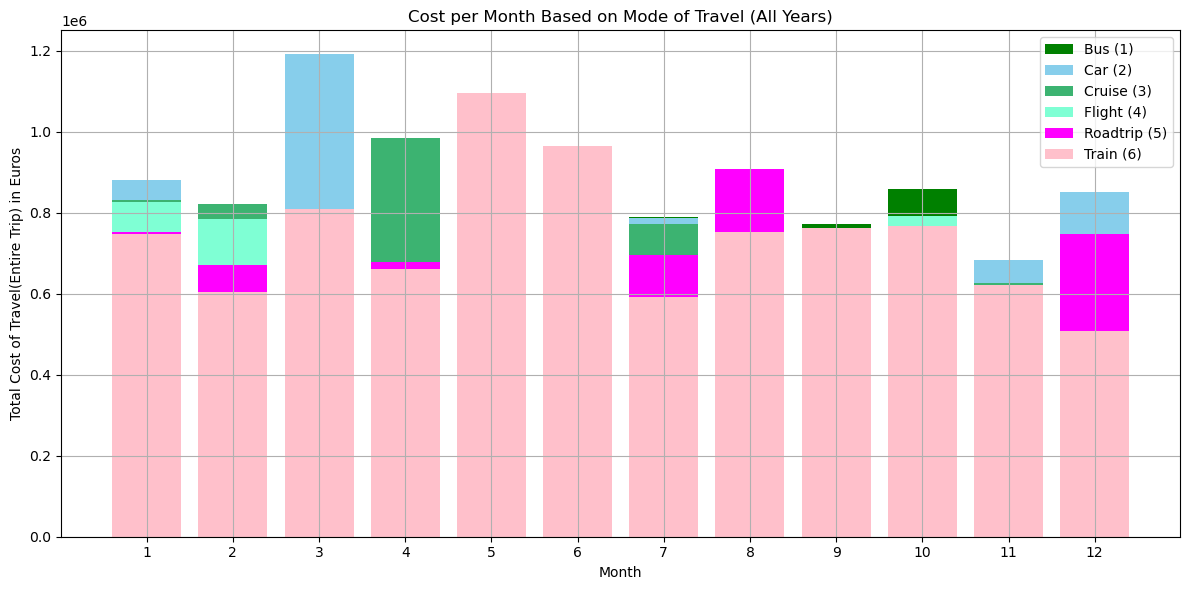

<Figure size 640x480 with 0 Axes>

In [23]:
# Group the data by "Mode of Travel" and month, and calculate the total cost per month
mode_cost_per_month = lending_data_df.groupby(['Mode of Travel', 'Month'])['Cost of Travel(Entire Trip) in Euros'].sum().reset_index()

# Create a bar plot to visualize the results
plt.figure(figsize=(12, 6))

colors = ['green', 'skyblue', 'mediumseagreen', 'aquamarine', 'magenta', 'pink']  # Define colors for legend labels

for i, mode in enumerate(mode_cost_per_month['Mode of Travel'].unique()):
    mode_data = mode_cost_per_month[mode_cost_per_month['Mode of Travel'] == mode]
    label = mode + f" ({i+1})"  # Add a unique identifier to the label
    plt.bar(mode_data['Month'], mode_data['Cost of Travel(Entire Trip) in Euros'], label=label, color=colors[i])

plt.xlabel("Month")
plt.ylabel("Total Cost of Travel(Entire Trip) in Euros")
plt.title("Cost per Month Based on Mode of Travel (All Years)")
plt.legend()
plt.xticks(range(1, 13))  # 1-12 represent the months
plt.grid(True)

plt.tight_layout()
plt.show()

# Save the plot to a PNG file
plt.savefig("cost_per_month.png", dpi=300, bbox_inches='tight')

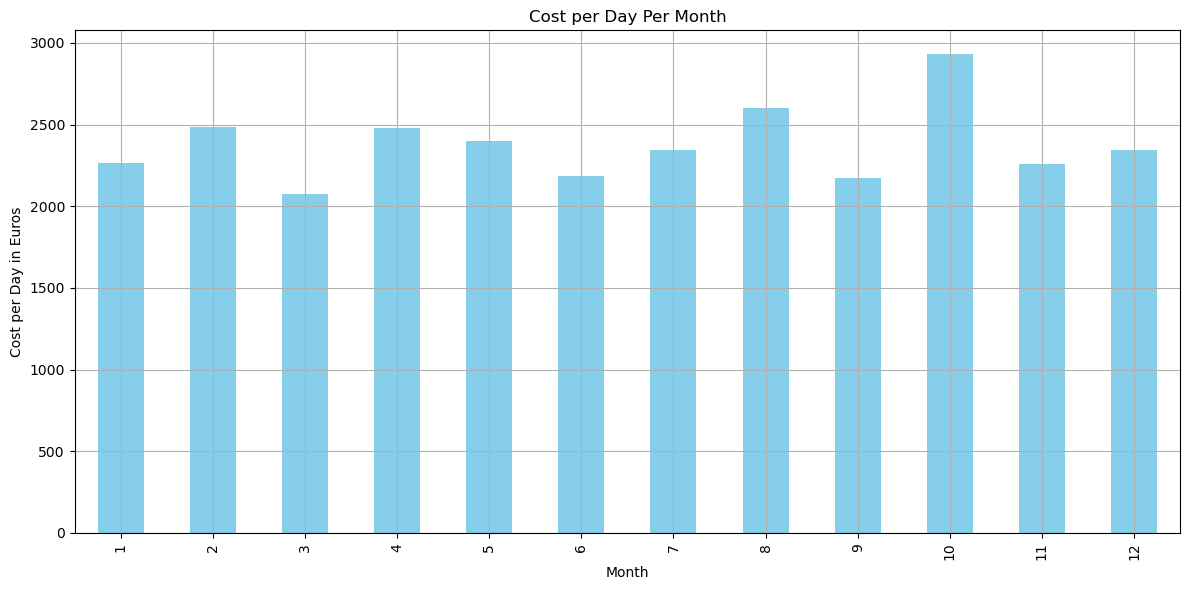

In [24]:
# Group the data by month and calculate the mean cost per day for each month
cost_per_day_per_month = lending_data_df.groupby('Month')['Cost per Day'].mean()

# Create a bar plot to visualize the results
plt.figure(figsize=(12, 6))
cost_per_day_per_month.plot(kind='bar', color='skyblue')

plt.xlabel("Month")
plt.ylabel("Cost per Day in Euros")
plt.title("Cost per Day Per Month")
plt.grid(True)

plt.tight_layout()

# Save the plot to a PNG file
plt.savefig("cost_per_day_per_month.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
